**INTRODUCTION** 
The Heart Disease UCI dataset labels each patient whether they have heart disease or not according to features in it. 
I will try to create a model to predict whether a patient has heart disease or not by using logistic regression. 

**About Dataset**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Each row in dataset represents a patient. There are 14 attributes/features:
1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type; ranges from 0 to 3 -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
4. **trestbps** - resting blood pressure (in mm Hg on hospital admission; ranges from 94 to 200)
5. **chol** - serum cholestrol in mg/dl; ranges from 126 to 564
6. **fbs** - fasting blood sugar > 120 mg/dl; 1 = true; 0 = false
7. **restecg** - resting electrocardiographic results; ranges from 0 to 2
8. **thalach** - maximum heart rate achieved; ranges from 71 to 202
9. **exang** - exercise induced angina; 1 = yes and 0 = no
10. **oldpeak** - ST depression induced by exercise relative to rest; ranges from 0 to 6.2
11. **slope** - slope of the peak exercise ST segment; ranges from 0 to 2
12. **ca** - no. of major vessels (0-4) colored by flourosopy
13. **thal** - 3 = normal; 6 fixed defect; 7 = reversable defect
14. **target** - 1 = yes for heart disease and 0 = no for heart disease

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Heart Disease Prediction"))

# Any results you write to the current directory are saved as output.

['heart.csv', 'Heart-Disease-Prediction.ipynb', '.ipynb_checkpoints']


In [10]:
heart_data = pd.read_csv("../Heart Disease Prediction/heart.csv")
heart_data.head()
#Show summary of numerical attributes
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


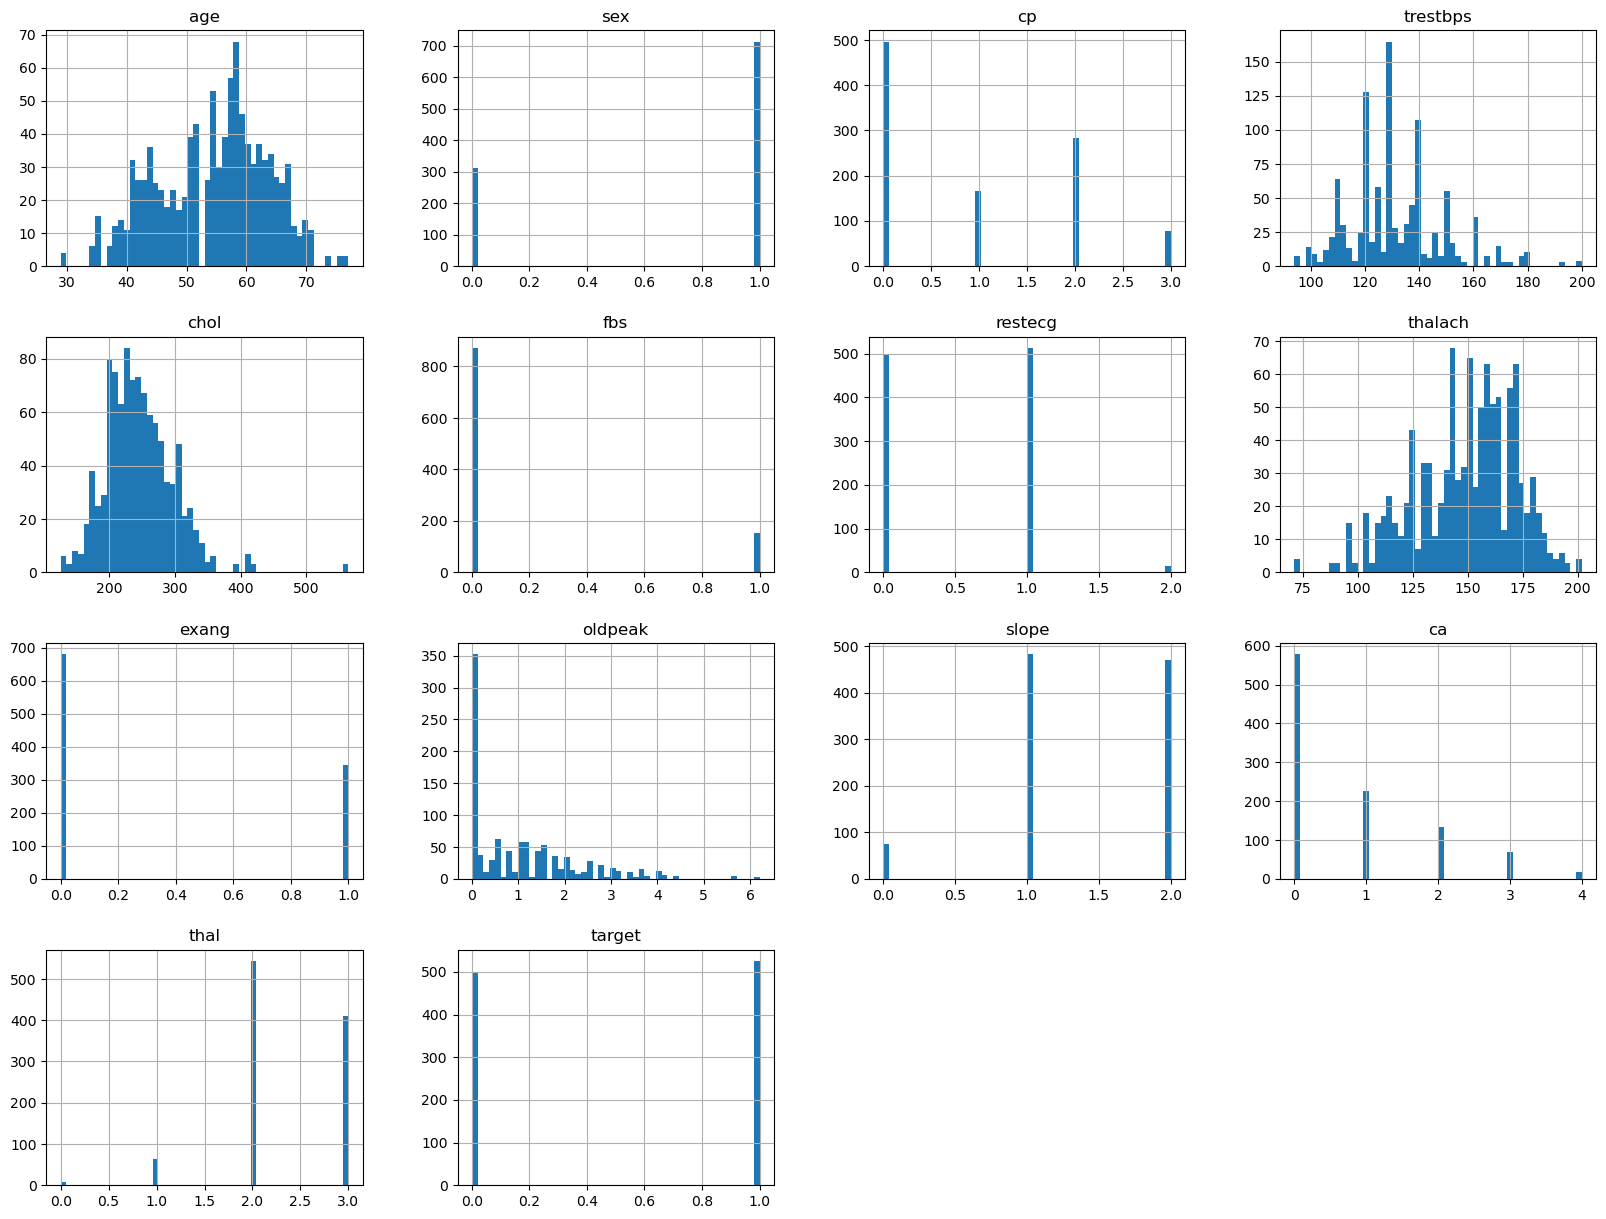

In [11]:
#Plot histogram from each attribute/feature
heart_data.hist(bins=50, figsize=(20,15))
plt.show()
#Notice the features are on very different scales. Need feature scaling later. Some are tail heavy.
#some of the historgrams are bell shaped while others have no uniform shape at all.

In [12]:
#Create a traing and test set using RANDOM sampling from the data for calculating generalization error later.
train_set, test_set = train_test_split(heart_data, test_size=0.2, random_state=42)
print(len(train_set), "+", len(test_set) )

820 + 205


In [24]:
#Instead of random sampling, create training and test set that are representative of all age groups/other
#feature. Since we know age plays one of the key roles in heart disease also, let's create the set
#so there are equal no. of people from each age group because we don't want to excluded
#or create bias in our data.

from sklearn.model_selection import StratifiedShuffleSplit
#create age category attribute (20-30, 31-40, 41-50...)
heart_data_1 = heart_data
heart_data_1["age_cat"] = np.floor(heart_data_1["age"] / 10)
len(heart_data_1) #303
heart_data_1["age_cat"].value_counts() 


age_cat
5.0    422
6.0    275
4.0    237
3.0     53
7.0     34
2.0      4
Name: count, dtype: int64

In [25]:

len(heart_data_1)

1025

<Axes: >

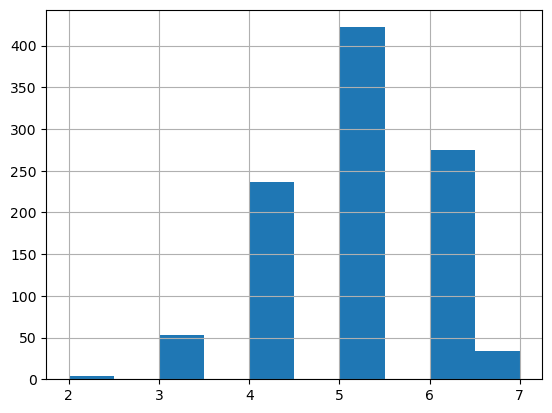

In [26]:
#histogram based on age distribution
heart_data_1["age_cat"].hist()

In [27]:
#now lets do STRATIFIED sampling based on the new age category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(heart_data_1, heart_data_1["age_cat"]):
        strat_train_set = heart_data_1.loc[train_index]
        strat_test_set = heart_data_1.loc[test_index]

print(len(strat_train_set), len(strat_test_set))
#Let's see if this worked as expected by looking at age_cat proportions in FULL/OVERALL heart set.
heart_data_1["age_cat"].value_counts() / len(heart_data_1) * 100
#5.0 is 41.39%
#6.0 is 26.49%
#.....

820 205


age_cat
5.0    41.170732
6.0    26.829268
4.0    23.121951
3.0     5.170732
7.0     3.317073
2.0     0.390244
Name: count, dtype: float64

In [28]:
#Now lets measure the age_cat proportions in STRATIFIED TRAIN set.
strat_train_set["age_cat"].value_counts() / len(strat_train_set) * 100

age_cat
5.0    41.219512
6.0    26.829268
4.0    23.170732
3.0     5.121951
7.0     3.292683
2.0     0.365854
Name: count, dtype: float64

In [29]:
#Now lets measure the age_cat proportions in STRATIFIED TEST set.
strat_test_set["age_cat"].value_counts() / len(strat_test_set) * 100

age_cat
5.0    40.975610
6.0    26.829268
4.0    22.926829
3.0     5.365854
7.0     3.414634
2.0     0.487805
Name: count, dtype: float64

In [30]:
#Let's compare all 3 - OVERALL, RANDOM, STRATIFIED

def age_cat_proportions(data):
    return ((data["age_cat"].value_counts() / len(data)) * 100)

def age_cat_counts(data):
    return (data["age_cat"].value_counts())

#Get RANDOM proportions 
rand_train_set, rand_test_set = train_test_split(heart_data_1, test_size=0.2, random_state=42)

pd.DataFrame({
    "Overall": age_cat_proportions(heart_data_1),
    "Overall Count": age_cat_counts(heart_data_1),
    "Stratified": age_cat_proportions(strat_train_set),
    "Stratified Count": age_cat_counts(strat_train_set),
    "Random": age_cat_proportions(rand_train_set),
    "Random Count": age_cat_counts(rand_train_set),
}).sort_index()
#compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
#compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

,Overall,Overall Count,Stratified,Stratified Count,Random,Random Count
age_cat,,,,,,
2.0,0.390244,4,0.365854,3,0.365854,3
3.0,5.170732,53,5.121951,42,5.731707,47
4.0,23.121951,237,23.170732,190,22.804878,187
5.0,41.170732,422,41.219512,338,41.341463,339
6.0,26.829268,275,26.829268,220,26.341463,216
7.0,3.317073,34,3.292683,27,3.414634,28


In [39]:
#length of training set
len(strat_train_set)

820

In [40]:
#length of test set
len(strat_test_set)

205

In [32]:
pd.DataFrame({
    "Overall": age_cat_proportions(heart_data_1),
    "Overall Count": age_cat_counts(heart_data_1),
    "Stratified Test Set": age_cat_proportions(strat_test_set),
    "Stratified Test Set Count": age_cat_counts(strat_test_set),
    "Random Test Set": age_cat_proportions(rand_test_set),
    "Random Test Set Count": age_cat_counts(rand_test_set),
}).sort_index()

,Overall,Overall Count,Stratified Test Set,Stratified Test Set Count,Random Test Set,Random Test Set Count
age_cat,,,,,,
2.0,0.390244,4,0.487805,1,0.487805,1
3.0,5.170732,53,5.365854,11,2.926829,6
4.0,23.121951,237,22.926829,47,24.390244,50
5.0,41.170732,422,40.975610,84,40.487805,83
6.0,26.829268,275,26.829268,55,28.780488,59
7.0,3.317073,34,3.414634,7,2.926829,6


In [34]:
strat_train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
289,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0,4.0
795,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1,6.0
446,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,5.0
546,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,7.0
804,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1,5.0


In [35]:
strat_test_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
422,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5.0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,5.0
666,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1,3.0
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1,3.0
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,5.0


In [41]:
#After completing analysis on stratified vs. Random sampling, remove age_cat attribute from stratified sets.
for set in (strat_train_set, strat_test_set):
    set.drop(["age_cat"], axis=1, inplace=True)

In [42]:
strat_train_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
795,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
446,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
546,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
804,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


In [43]:
strat_test_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
422,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
666,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**GATHER MORE INSIGHTS FROM DATA**

In [44]:
#Gather more insights from data
#Let’s create a copy so you can play with it without harming the training set:
strat_heart = strat_train_set.copy()
len(strat_heart)

820

In [45]:
strat_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
795,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
446,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
546,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
804,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


In [46]:
heart_test = strat_test_set.copy()
len(heart_test)

205

<Axes: xlabel='age'>

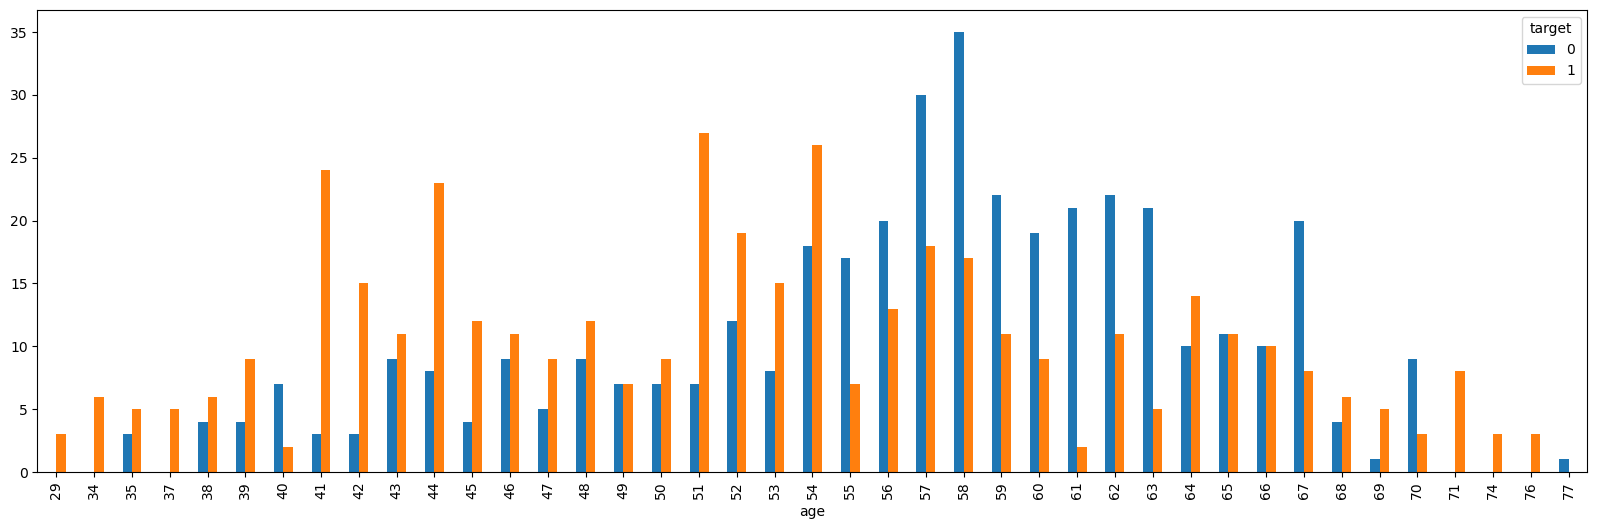

In [47]:
#Let's check whether heart disease increases with age
pd.crosstab(strat_heart.age,strat_heart.target).plot(kind="bar",figsize=(20,6))

In [48]:
#Let's look for correlations between every pair of attributes using corr() method:

corr_matrix = strat_heart.corr()

#let' see how much each attribute correlates to the age value:
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
ca          0.274481
trestbps    0.266701
chol        0.229542
oldpeak     0.196056
fbs         0.112965
exang       0.088818
thal        0.073627
cp         -0.072917
sex        -0.110883
restecg    -0.118108
slope      -0.155555
target     -0.226467
thalach    -0.403314
Name: age, dtype: float64

In [49]:
#let' see how much each attribute correlates to the target value:
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.440060
thalach     0.418036
slope       0.353760
restecg     0.130031
fbs        -0.061021
chol       -0.088851
trestbps   -0.163103
age        -0.226467
sex        -0.292706
thal       -0.338003
ca         -0.411772
exang      -0.440747
oldpeak    -0.440769
Name: target, dtype: float64

array([[<Axes: xlabel='target', ylabel='target'>,
        <Axes: xlabel='age', ylabel='target'>,
        <Axes: xlabel='cp', ylabel='target'>,
        <Axes: xlabel='thalach', ylabel='target'>,
        <Axes: xlabel='slope', ylabel='target'>,
        <Axes: xlabel='oldpeak', ylabel='target'>],
       [<Axes: xlabel='target', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='slope', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>],
       [<Axes: xlabel='target', ylabel='cp'>,
        <Axes: xlabel='age', ylabel='cp'>,
        <Axes: xlabel='cp', ylabel='cp'>,
        <Axes: xlabel='thalach', ylabel='cp'>,
        <Axes: xlabel='slope', ylabel='cp'>,
        <Axes: xlabel='oldpeak', ylabel='cp'>],
       [<Axes: xlabel='target', ylabel='thalach'>,
        <Axes: xlabel='age', ylabel='thalach'>,
        <Axes: xlabel='cp', ylabel='thalach'>,
        <Ax

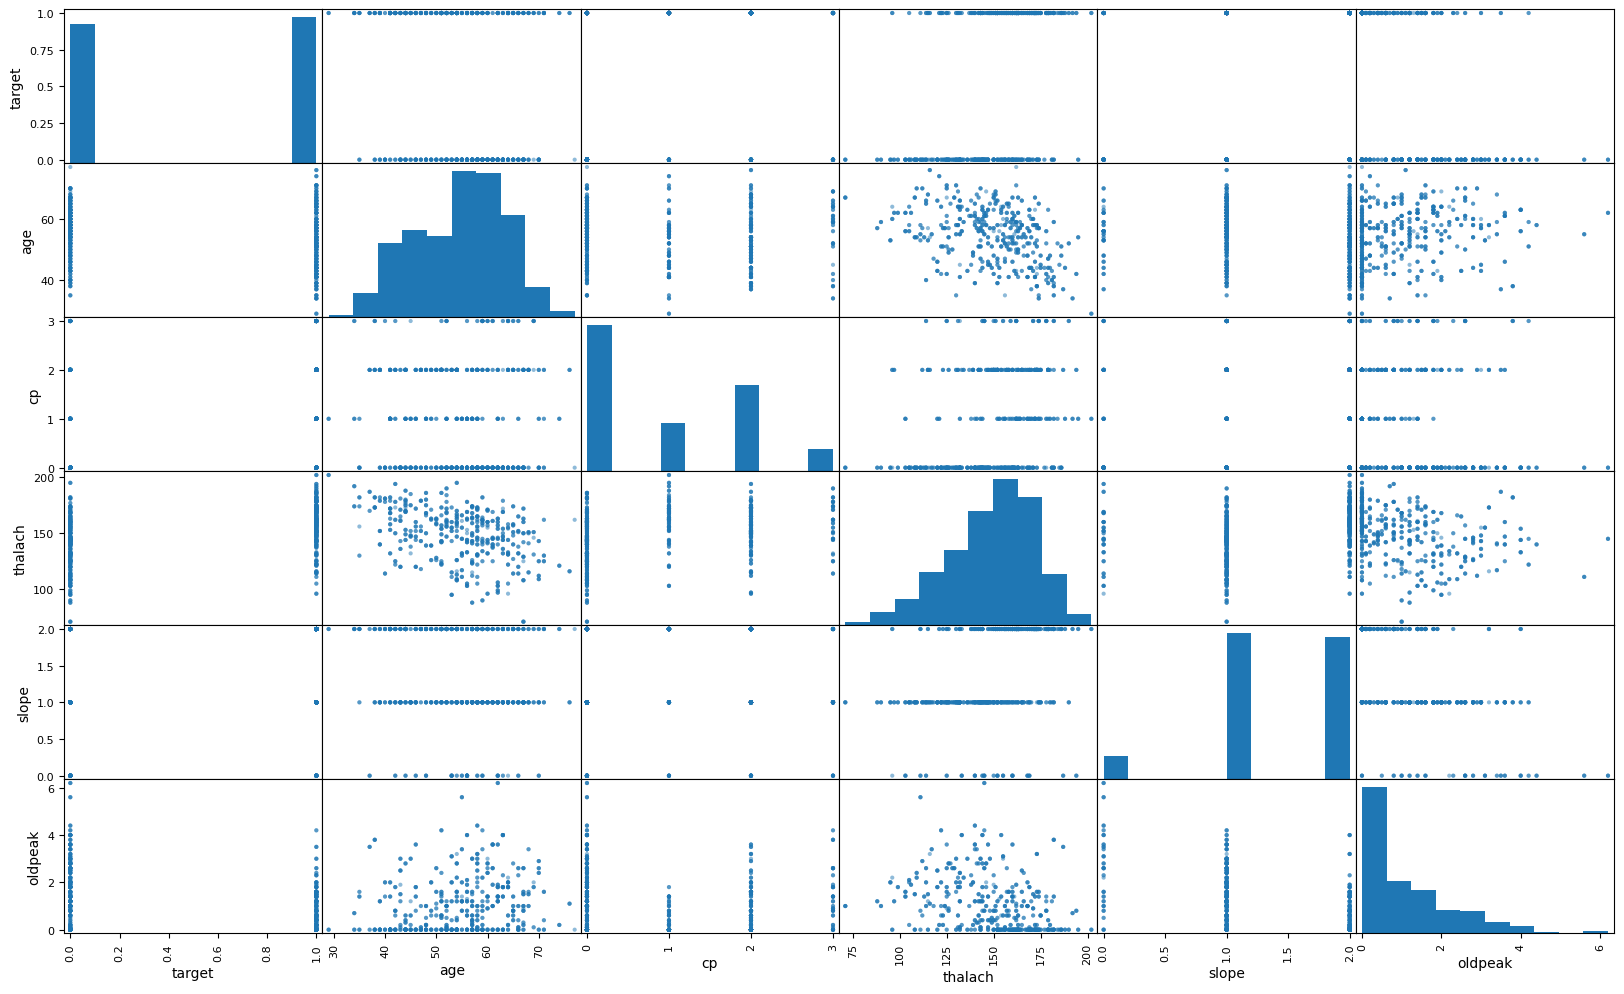

In [50]:
#Another way to check correlation between attributes is to use Pandas scatter_matrix
#function, which plots every numerical attribute against every other one. This will
#give us 14 * 14 = 196 plots. We'll plot only promising ones.
from pandas.plotting import scatter_matrix
attributes = ["target", "age", "cp", "thalach", "slope", "oldpeak"]
scatter_matrix(strat_heart[attributes], figsize=(20, 12))

**Prepare the Data for Machine Learning Algorithms**


In [51]:
#Clean the training set & let's separate the predictors and the labels since
#we don't necessarily want to apply the same transformations to the predictors
#and target values in dataframe.
heart = strat_heart.drop("target", axis=1)
heart_labels = strat_heart["target"].copy()

In [52]:
heart_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
422,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
666,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
heart_test_labels = heart_test["target"].copy()
heart_test = heart_test.drop("target", axis=1)
heart_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
422,57,0,0,120,354,0,1,163,1,0.6,2,0,2
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2
666,35,1,1,122,192,0,1,174,0,0.0,2,0,2
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [54]:
#In case there is any missing values, we have option of either removing entire
#attribute or remove rows or set some default values (i.e. zero/mean/median).
#This can be accomplished using DataFrame's dropna(), drop(), and fillna().
#Use "sklearn.preprocessing import Imputer" class to replace each attribute
#missing values with the median of that attribute(but only used for numerical
#attributes).

#SciKit-Learn API has below main design principles:

#-Estimators - Any object (like Imputer) to estimate some paramters (say median) 
#based on a dataset is called estimators. The estimation is performed by fit()
#method & it takes dataset as parameter (training data & labels). Any other
#parameter needed to help in estimation process is considered hyperparameter.

#Transformers - Some estimators can also help in tranforming the dataset. 
#The transformation is 
#performed by transform() method & it returns transformed dataset. All 
#transformers have fit_transform() method that is equivalent of calling fit()
#and then transform() and its sometimes optimized to run faster.

#Predictors - Finally some estimators are capable of making predictions given 
#a dataset, they are called predictors. For e.g. the LinearRegression model is
#a predictor. A predictor has predict() method which takes dataset and returns
#a dataset of corressponding predictions.

#Inspection - All the estimator’s hyperparameters are accessible directly via 
#public instance variables (e.g., imputer.strategy), and all the estimator’s 
#learned parameters are also accessible via public instance variables with 
#an underscore suffix (e.g., imputer.statistics_).

#Nonproliferation of classes - Datasets are represented as NumPy arrays or 
#SciPy sparse matrices, instead of homemade classes. Hyperparameters are 
#just regular Python strings or numbers.

#Composition. Existing building blocks are reused as much as possible. 
#For example, it is easy to create a Pipeline estimator from an arbitrary 
#sequence of transformers followed by a final estimator, as we will see.

In [55]:
#You can convert text/categorical attributes to numbers using transformers
#such as LabelEncoder. You can apply transformations to convert from text
#categories to integer categories, then integer categories to one-hot
#vectors (which store 1 for 1 category attribute and 0 for remaining).

#Sometimes you will need to create custom transformers class to write your
#own tasks such as custom cleanup operations or combining specific attributes.

**Feature Scaling**


In [56]:
#One of the most important transformations you need to apply to your data is 
#feature scaling. With few exceptions, Machine Learning algorithms don’t perform 
#well when the input numerical attributes have very different scales.
#Note that scaling the target values is generally not required.

#age ranges from 29 to 77
#cp is 0 to 3
#thalach is 71 to 202
#.......

#There are two common ways to get all attributes to have the same scale: 
#min-max scaling (normalization) and standardization.

#min-max scaling (normalization) -> (x - xmin) / (xmax - xmin)
#Scikit-Learn provides a transformer called MinMaxScaler for this. It has a 
#feature_range hyperparameter that lets you change the range if you don’t 
#want 0–1 for some reason.

#Unlike min-max scaling, standardization does not bound values to a specific 
#range, which may be a problem for some algorithms (e.g., neural networks 
#often expect an input value ranging from 0 to 1). However, standardization 
#is much less affected by outliers.

In [67]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
289,40,1,0,152,223,0,1,181,0,0.0,2,0,3
795,62,1,1,128,208,1,0,140,0,0.0,2,0,2
446,53,1,2,130,246,1,0,173,0,0.0,2,3,2
546,70,1,0,130,322,0,0,109,0,2.4,1,3,2
804,58,0,0,130,197,0,1,131,0,0.6,1,0,2


In [69]:
#heart - training data
#heart_labels - training data labels
#heart_test - test data
#heart_test_labels - test data labels
x = (heart - np.min(heart)) / (np.max(heart) - np.min(heart))
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
289,0.070922,0.001773,0.000000,0.269504,0.395390,0.000000,0.001773,0.320922,0.0,0.000000,0.003546,0.000000,0.005319
795,0.109929,0.001773,0.001773,0.226950,0.368794,0.001773,0.000000,0.248227,0.0,0.000000,0.003546,0.000000,0.003546
446,0.093972,0.001773,0.003546,0.230496,0.436170,0.001773,0.000000,0.306738,0.0,0.000000,0.003546,0.005319,0.003546
546,0.124113,0.001773,0.000000,0.230496,0.570922,0.000000,0.000000,0.193262,0.0,0.004255,0.001773,0.005319,0.003546
804,0.102837,0.000000,0.000000,0.230496,0.349291,0.000000,0.001773,0.232270,0.0,0.001064,0.001773,0.000000,0.003546


In [71]:
x_test = (heart_test - np.min(heart_test)) / (np.max(heart_test) - np.min(heart_test))
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
422,0.139364,0.000000,0.000000,0.293399,0.865526,0.0,0.002445,0.398533,0.002445,0.001467,0.004890,0.000000,0.004890
9,0.132029,0.002445,0.000000,0.298289,0.699267,0.0,0.000000,0.283619,0.002445,0.007824,0.002445,0.004890,0.004890
666,0.085575,0.002445,0.002445,0.298289,0.469438,0.0,0.002445,0.425428,0.000000,0.000000,0.004890,0.000000,0.004890
149,0.095355,0.002445,0.004890,0.342298,0.784841,0.0,0.000000,0.444988,0.000000,0.000000,0.004890,0.000000,0.004890
882,0.139364,0.002445,0.000000,0.317848,0.320293,0.0,0.002445,0.281174,0.002445,0.002934,0.002445,0.002445,0.007335


**Transformation Pipelines**


In [72]:
#As you can see, there are many data transformation steps that need to be 
#executed in the right order. Fortunately, Scikit-Learn provides the Pipeline 
#class to help with such sequences of transformations. Here is a small pipeline 
#for the numerical attributes:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
#     num_pipeline = Pipeline([
#             ('imputer', Imputer(strategy="median")),
#             ('attribs_adder', CombinedAttributesAdder()),
#             ('std_scaler', StandardScaler()),
#         ])
#     housing_num_tr = num_pipeline.fit_transform(housing_num)

#The Pipeline constructor takes a list of name/estimator pairs defining a 
#sequence of steps. All but the last estimator must be transformers (i.e., 
#they must have a fit_transform() method). The names can be anything you like.

#You now have a pipeline for numerical values, and you also need to apply the 
#LabelBi narizer on the categorical values: how can you join these transformations 
#into a sin‐ gle pipeline? Scikit-Learn provides a FeatureUnion class for this. 
#You give it a list of transformers (which can be entire transformer pipelines), 
#and when its transform() method is called it runs each transformer’s transform() 
#method in parallel, waits for their output, and then concatenates them and 
#returns the result (and of course calling its fit() method calls all each 
#transformer’s fit() method).

In [73]:
x.to_csv('heart_training_data.csv', index=False)

In [74]:
len(x)

820

In [75]:
#There is an empty row in x. Drop empty row in the dataframe x
x.dropna(axis=0, inplace=True)

In [76]:
len(x)

820

In [77]:
len(heart_labels)

820

In [78]:
#Remove empty row from heart_labels dataframe as well.
heart_labels.dropna(axis=0, inplace=True)

In [79]:
len(heart_labels)

820

In [80]:
#Scikit-Learn's Stochastic Gradient Classifier - Training binary classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x, heart_labels)

SGDClassifier(random_state=42)

In [81]:
#Predict using Stochastic Gradient Classifier
sgd_predictions = sgd_clf.score(x_test, heart_test_labels)
print('Stochastic Gradient Classifier Accuracy score: ', sgd_predictions*100)

Stochastic Gradient Classifier Accuracy score:  64.8780487804878


In [82]:
#Scikit-Learn's Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, heart_labels)
print("Logistic Regression Accuracy score: ", log_reg.score(x_test,heart_test_labels)*100)

Logistic Regression Accuracy score:  63.90243902439025


In [83]:
#Scikit-Learn's KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(x, heart_labels)
print("KNN Model Accuracy score: ", knn.score(x_test, heart_test_labels)*100)

KNN Model Accuracy score:  40.97560975609756


In [84]:
#Scikit-Learn's Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x, heart_labels)
print("SVM Algorithm Accuracy score: ", svm.score(x_test,heart_test_labels)*100)

SVM Algorithm Accuracy score:  60.0


In [85]:
#Scikit-Learn's Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x, heart_labels)
print("Naive Bayes Algorithm Accuracy :", nb.score(x_test,heart_test_labels)*100)

Naive Bayes Algorithm Accuracy : 75.1219512195122


In [86]:
#Scikit-Learn's Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
dt_class.fit(x, heart_labels)
print("Decision Tree Algorithm Accuracy :", dt_class.score(x_test, heart_test_labels)*100)

Decision Tree Algorithm Accuracy : 54.63414634146342


In [87]:
#Scikit-Learn's Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_class.fit(x, heart_labels)
print("Random Forest Algorithm Accuracy :", rf_class.score(x_test,heart_test_labels)*100)

Random Forest Algorithm Accuracy : 72.1951219512195
